<a href="https://colab.research.google.com/github/Scammaz/Dictionnaire/blob/master/Laurent_Lab1_GTI771_J24_Ver2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GTI771 - Apprentissage machine avancé
## Département de génie logiciel et des technologies de l’information (LogTI)



## Laboratoire 1 - Préparation des données
#### <font color=black> Version 2 - Janvier 2024 </font>

##### <font color=grey> Version 1 - Prof. Alessandro L. Koerich.
##### Version 2 - Chargé de lab. Arthur Josi

Les laboratoires sont à faire par groupe de deux ou trois étudiants. Favorisez les groupes de trois.

| NOMS                  | CODE PERMANENT                                   |
|-----------------------|--------------------------------------------------|
| Hugo Rhéaume-Simard   | RHEH93080004                                     |
| Laurent Marleau-Gallant             |  MARL05109800                                            |
| Yulia Bakaleinik             | BAKY30539705                                            |

# Introduction

Ce premier laboratoire porte sur la préparation de données pour l'apprentissage machine. Le problème de classification qui vous est présenté est le problème [Facial Expression Recognition (FER)](https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data), dont le but est de classer des visages dans sept catégories.

Veuillez noter que les images qui vous sont fournies ne sont pas nécessairement très faciles à travailler. Plusieurs images comportent du bruit, des artéfacts ou des éléments non pertinents. Le défi de ce laboratoire repose sur cette difficulté qui est chose courante dans les problèmes d’apprentissage machine moderne.

Voici, en exemple, des images de visages se retrouvant dans l’ensemble de données:

![Exemples de FER](https://miro.medium.com/max/2420/1*nXqJ4lMiBRp4Ilm3bpRxuA.png)

L’évaluation de ce laboratoire sera basée sur:
- la qualité des algorithmes proposés et utilisés;
- les réponses aux questions dans ce notebook;
- l'organisation de votre code source (SVP, n'oubliez pas de mettre des commentaires dans le code source!)

# Modules et bibliotèques python

### Import de bibliotèques

###  <font color=blue> À faire: </font>
N'oubliez pas d'ajouter une courte description aux bibliothèques que vous allez utiliser pour compléter ce notebook.

In [1]:
import numpy as np  # package for scientific computing with Python.
import matplotlib.pyplot as plt # 2D plotting library

# Partie 1 - Analyse exploratoire des données

On va commencer par regarder les données, c'est une pratique indispensable.

Pour ce lab, nous allons utiliser le dataset Facial Emotion Recognition (FER).

L'ensemble de données est disponible dans Moodle. Il contient presque 35,000 images de visages, avec une résolution de 48$\times$48 pixels en niveau de gris.

Les images se trouvent dans un fichier csv sous la forme d’un vecteur de 2,304 scalaires avec des valeurs entre 0 et 255.

Les partitions apprentissage, validation et test sont déjà préétablies.

Format du fichier: Emotion,Pixels,Usage avec:
- Emotion:  integer [0, 6]
- Pixels:   integer [0, 255]
- Usage:    string [Training, PublicTest, PrivateTest]

## Charger le fichier de données

In [2]:
# Load data
ferData = np.loadtxt('content/fer2013.csv', delimiter=',', dtype=str )

# Training partition
Xtrain = np.ones( (28709,2304), float )

for i in range( 1, 28710 ):
    Xtrain[i-1] = ferData[i,1].split(" ")

ytrain = ferData[1:28710,0].astype( int )

# Validation partition
Xval = np.ones( (3589,2304), float )

for i in range( 28710, 32299 ):
    Xval[i-28710] = ferData[i,1].split(" ")

yval = ferData[28710:32299,0].astype( int )

# Test partition
Xtest = np.ones( (3589,2304), float )

for i in range( 32299, 35887 ):
    Xtest[i-32299] = ferData[i,1].split(" ")

ytest = ferData[32299:,0].astype( int )

print(Xtrain.shape, Xval.shape, Xtest.shape)

(28709, 2304) (3589, 2304) (3589, 2304)


In [3]:
# Reshape les vecteurs de 2,304 dimensions vers matrices 48x48
# Afin d'avoir [samples][channels][width][height]

Xtrain = Xtrain.reshape( Xtrain.shape[0], 1, 48, 48 ).astype('uint8')
Xtest  = Xtest.reshape( Xtest.shape[0], 1, 48, 48 ).astype('uint8')
Xval   = Xval.reshape( Xval.shape[0], 1, 48, 48 ).astype('uint8')

print( Xtrain.shape, Xval.shape, Xtest.shape )

(28709, 1, 48, 48) (3589, 1, 48, 48) (3589, 1, 48, 48)


## <font color=black> 1a: Visualisation des images de visages </font>

###  <font color=blue> À faire: </font>

1. Créer une grille de dimension 7 lignes $\times$ $4$ colones avec des images de visage prises aleatoirement dans l'ensemble de apprentissage. Montrer une catégorie dans chaque ligne.

Vous pouvez visualiser les images en utilisant `plt.imshow`.


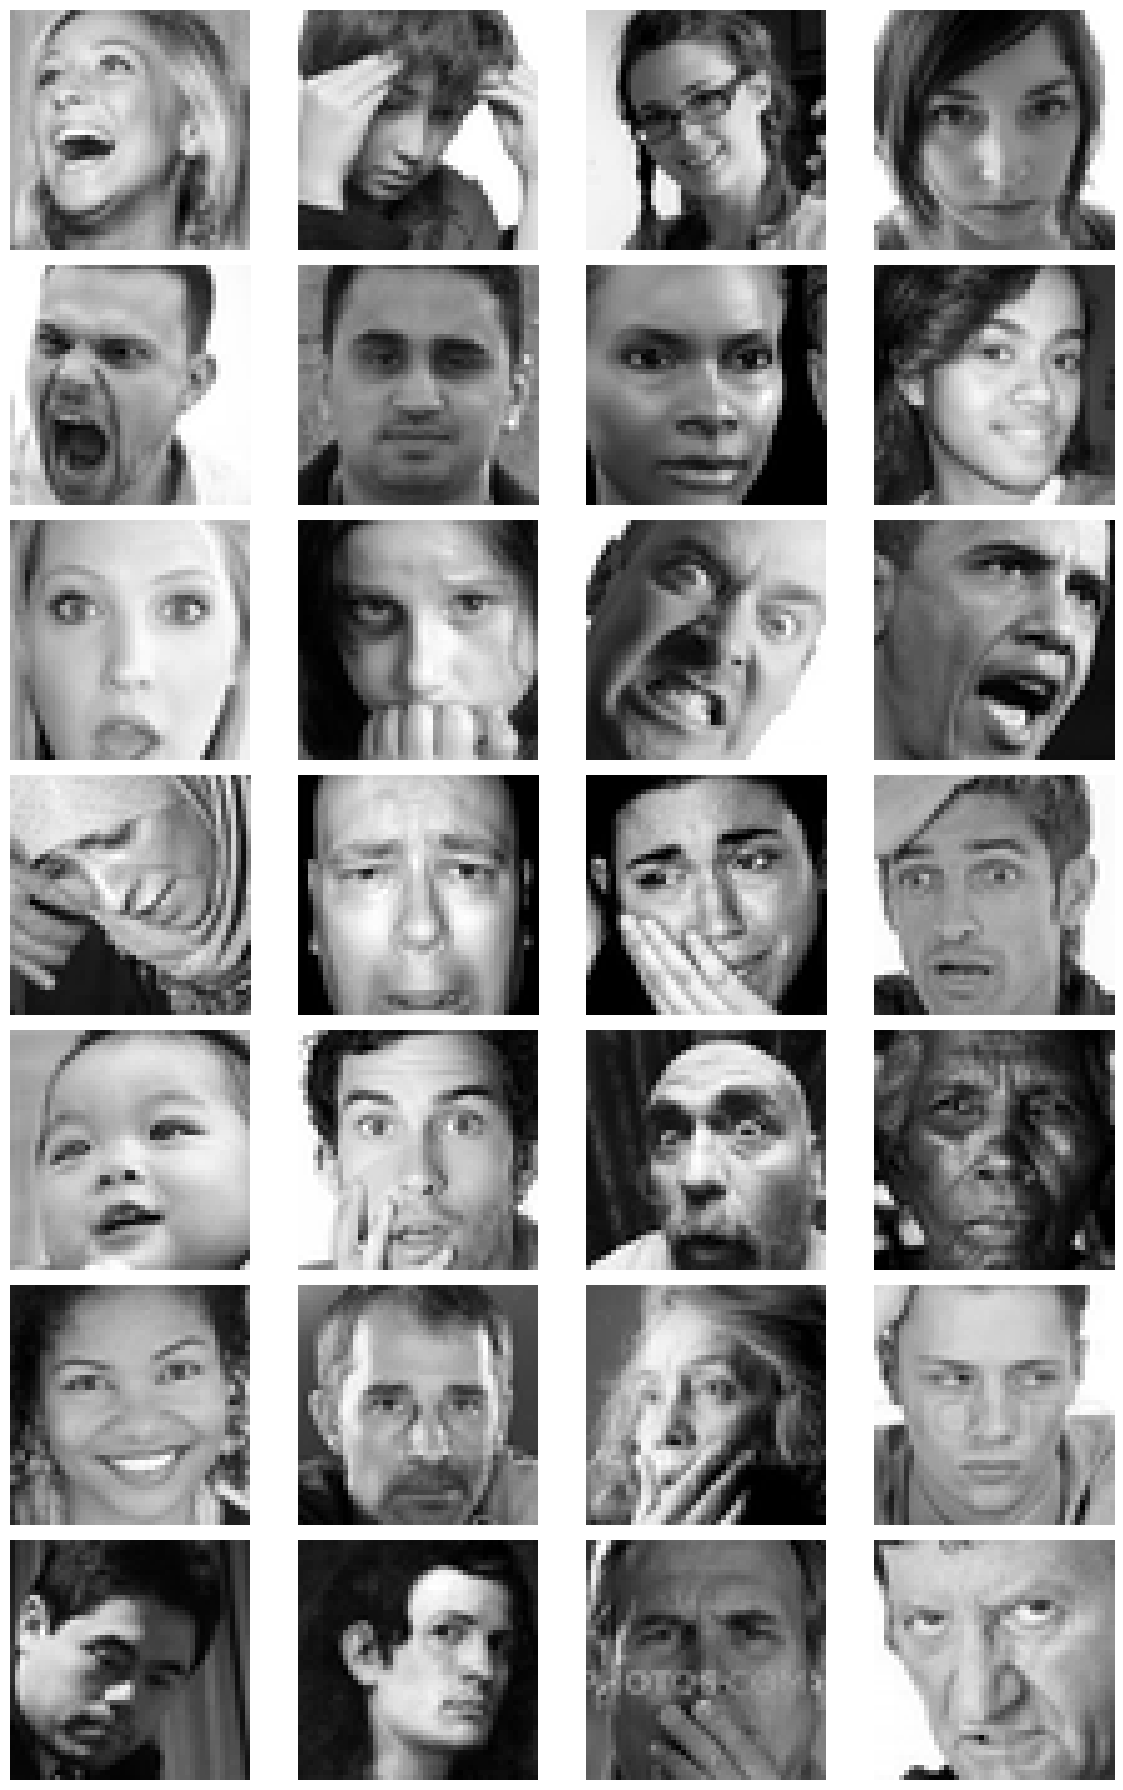

In [4]:
#Votre code ici (Laurent)
import random



fig, axes = plt.subplots(7, 4, figsize=(12, 18))

for i in range(7):
    for j in range(4):
        # Generate a random index
        random_number = random.randint(0, 28709)

        # Get the image data for the random index
        image_data = Xtrain[random_number].reshape(48, 48)

        # Plot the image on the corresponding subplot
        axes[i, j].imshow(image_data, cmap='gray')
        axes[i, j].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()



## 1b: Statistiques des données

Est-ce que vous avez un ensemble de données balancé? C.-à-d., une distribution égalitaire d’exemples par classe?

###  <font color=blue> À faire: </font>

1. Montrer les histogrammes de distribution des données pour les partitions de validation et test.

#### Code

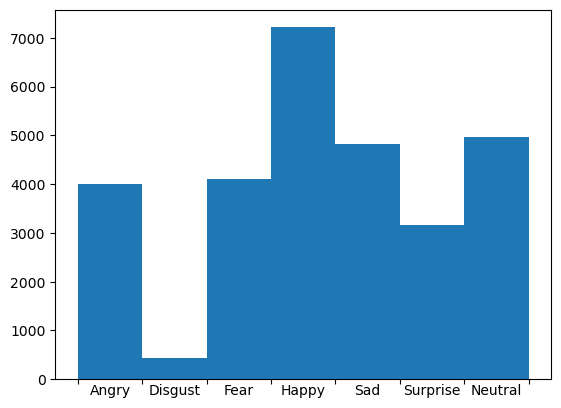

In [5]:
### Code exemple pour la base d'entrainement:

# Histogramme des étiquettes (classes) - Apprentissage
hist, _ = np.histogram(ytrain, density=False, bins=7, range=(0, 7))

fig, ax = plt.subplots()

ax.hist(ytrain, bins = [0,1,2,3,4,5,6,7])

ax.set_xticklabels([])
#(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
mticks = ax.get_xticks()
ax.set_xticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], minor=True)
ax.tick_params(axis='x', which='minor', length=0)
ax.set_xticklabels(labels, minor=True)
plt.show()

### Votre code ici pour validation et test



# Partie 2 - Préparation des données

## 2a: Nettoyage et normalisation des données

Avant de passer à d'autres étapes, vous devez vous assurer que il n'y a pas de:
- données abberantes;
- valeurs manquantes;
- valeurs inapplicables ou aberrantes;
- etc.   

###  <font color=blue> À faire: </font>

1. Concevoir un algorithme pour vérifier l'intégrité des données, faire des corrections si nécessaires, et finalement, normaliser les données dans la plage [0, 1].
2. Appliquer sur les ensembles d’apprentissage et validation. Attention! Étant donné que les données de l'ensemble de test sont considérées "inconnues" préalablement, il faut bien réfléchir quoi faire avec ces données.
3. Générer un fichier *fer2013-clean.csv* (même format) avec les données nettoyées et normalisées.

4. Décrire les étapes de votre algorithme/code.

#### Code

Ici on trouve la liste des index invalide du fichier CSV, on utilise une methode assez simple, pour les images qui ont des moyennes de pixels trop haute ou trop basse selon leur zscore, on enregistre leurs index.

In [6]:
# Votre code ici
import pandas as pd
from os import terminal_size
from scipy.stats import zscore


#Calc la moyenne des X_Train
list_of_mean = []
i = 0

for img in Xtrain:
  meany = np.mean(Xtrain[i].reshape(48,48))
  i += 1
  list_of_mean.append(meany)
indexXtrain = i

### Validate XVal too
j = 0
for img in Xval:
  meany = np.mean(Xval[j])
  i += 1
  j += 1
  list_of_mean.append(meany)
indexXval = indexXtrain+j
j = 0
for img in Xtest:
    meany = np.mean(Xtest[j])
    j+=1
    i+=1
    list_of_mean.append(meany)


z = zscore(list_of_mean)
threshold = 3


#cree liste item valide
list_valid = []
i = 0
for item in z:
    if(item <= threshold and item >= -threshold):
      #On doit ajouter 1 au indexes pour que ca match avec le csv
      list_valid.append(i+1)
    i += 1

#cree liste item invalide

list_invalid_index = []
i = 0
for item in z:
    if(item >= threshold or item <= -threshold):
      list_invalid_index.append(i+1)
    i += 1

j = 0


##Print les items invalide
for index in list_invalid_index:
    if index <indexXtrain:
      image_data = Xtrain[index-1].reshape(48, 48)
    if index >=indexXtrain and index <= indexXval:
      image_data = Xval[index-1 - indexXtrain].reshape(48, 48)
    if index >= indexXval:
      image_data = Xtest[index-1 - indexXval].reshape(48, 48)

   # plt.imshow(image_data, cmap='gray')  # 'gray' colormap for grayscale images
   # plt.axis('off')  # Turn off axis labels
   # plt.show()
    print(index)
    pass






60
423
2060
2810
3263
3932
4103
4276
5202
5275
5440
5535
5882
6459
7173
7497
7630
8738
9027
9680
10424
11287
11801
11847
12353
13149
13157
13403
13989
14280
15145
15656
15839
15895
17078
17082
19239
19462
19633
20223
20418
20713
20818
21818
22199
22928
23732
24892
25220
25910
26898
28602
29448
29547
29558
29862
30003
30706
31826
32663
34335
34682
35122
35574
35633
35677
35744
35887


In [7]:
filename = 'content/fer2013-clean.csv'
oldfile = 'fer2013.csv'

#Inverser les indexes pour pouvoir enlever les indexes sans affecter l'ordre
list_invalid_index.reverse()

#Creer un backup des ferData
ferDataBack = ferData
rowBefore = ferData.shape[0]
print("Rows before:" ,ferData.shape[0])

ferDataBack = np.delete(ferDataBack, list_invalid_index, axis=0)

rowAfter = ferDataBack.shape[0]
print("Row after:", rowAfter)
print("Deleted rows:",rowBefore-rowAfter)

np.savetxt(filename, ferDataBack, delimiter=',', fmt='%s')
print(f"Data saved to {filename}")






Rows before: 35888
Row after: 35820
Deleted rows: 68
Data saved to content/fer2013-clean.csv


#### Description

Votre description ici

## 2b: Prétraitement des images

**Point de départ:** *fer2013-clean.csv*

Il y a différents types de prétraitement que nous pouvons appliquer à des images dans les ensembles de données pour réduire la variabilité, réduire des bruits, etc.

En particulier, pour les images de visage, quelques prétraitements peuvent se montrer utiles, comme:
- Localisation/recadrage du visage.
- Localisation les yeux.
- Lissage du visage.
- Normalisation du contraste.
- Etc.

###  <font color=blue> À faire: </font>

1. Appliquer au moins un prétraitement sur les images de visages. Vous pouvez choisir différents algorithmes de prétraitement d’images dans [scikit-image](https://scikit-image.org/docs/stable/api/api.html). Vous pouvez aussi trouver d’autres types de prétraitement qui sont plus généraux dans [scikit-learn](https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing).
2. Appliquer ce/ces algorithmes sur les ensembles d’apprentissage et validation. Attention! Étant donné que les données de l'ensemble de test sont considérées "inconnues" préalablement, il faut à nouveau bien réfléchir quoi faire avec ces données pour ne pas biaiser vos resultats, voir les rendre faux!
3. Générer un fichier *fer2013-clean-pre.csv* (même format) avec les données après le pretraitement.

4. Expliquer et justifier le prétraitement utilisé.


#### Code

In [16]:
import numpy as np
import cv2
from skimage.filters import unsharp_mask

from skimage import color, filters
from skimage import color, feature, filters, io
from skimage.filters.rank import otsu
from skimage.filters import threshold_mean, threshold_local
from skimage import exposure

# Copy the original data
ferDataBackClean = np.loadtxt('content/fer2013-clean.csv', delimiter=',', dtype=str)

def join_values(array, separator=' '):
    """
    Join the values of a numpy array into a string with a specified separator.

    Parameters:
        array (numpy.ndarray): The input array.
        separator (str, optional): The separator between values. Defaults to ' '.

    Returns:
        str: The string with joined values.
    """
    # Initialisation de la chaîne résultante
    string_result = ''

    # Ajouter chaque valeur du tableau à la chaîne résultante avec un espace comme séparateur
    for i, value in enumerate(array):
        # Formater la valeur pour avoir uniquement 5 chiffres après la virgule
        formatted_value = "{:.0f}".format(value)
        string_result += formatted_value
        # Ajouter le séparateur si ce n'est pas le dernier élément
        if i < len(array) - 1:
            string_result += separator

    return string_result

def processImage(image):
    # Face detection (note: equalized_image should be converted to uint8 for OpenCV)

    
    image = image.reshape(48, 48)

    equalized_image_uint8 = (image).astype('uint8')
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    faces = face_cascade.detectMultiScale(equalized_image_uint8, scaleFactor=1.1, minNeighbors=5)
    # Assuming the first detected face is the one to process (could loop if multiple faces)
    if len(faces) > 0:
        (x, y, w, h) = faces[0]
        face = image[y:y+h, x:x+w]
        # Resize to standard size (48x48)
        face_resized = cv2.resize(face, (48, 48))

        # Smooth out the face using Gaussian smoothing
        smoothed_face = filters.gaussian(face_resized, sigma=1.0)
        image = smoothed_face
        r1 = unsharp_mask(image/255, radius=20.0, amount=1.0)
        r1 = (r1 * 255).astype(np.uint8)
        imageReturned = r1
        return imageReturned
    else:
        return image

for i in range(1, ferDataBackClean.shape[0]):
    img_str = ferDataBack[i, 1].split(" ")
    
    iprocessed = processImage(np.array(img_str, dtype=np.float32))

    flattened_processed_image = iprocessed.flatten()

    string_processed_image = join_values(flattened_processed_image)

    ferDataBackClean[i, 1] = string_processed_image

# Save the cleaned data to a CSV file
np.savetxt('content/fer2013-clean-pre.csv', ferDataBackClean, delimiter=',', fmt='%s')


2304
['255', '254', '255', '254', '254', '179', '122', '107', '95', '124', '149', '150', '169', '178', '179', '179', '181', '181', '184', '190', '191', '191', '193', '190', '190', '195', '194', '192', '193', '196', '193', '192', '188', '182', '173', '162', '152', '144', '129', '116', '113', '106', '184', '255', '252', '254', '255', '255', '255', '254', '254', '255', '238', '146', '122', '108', '126', '148', '167', '172', '179', '182', '184', '185', '184', '185', '186', '188', '189', '191', '188', '190', '192', '192', '192', '192', '194', '194', '194', '193', '187', '182', '179', '176', '168', '159', '146', '126', '120', '118', '148', '247', '253', '253', '255', '255', '255', '254', '253', '255', '212', '141', '125', '129', '153', '168', '172', '179', '182', '183', '187', '185', '185', '187', '188', '190', '192', '190', '192', '194', '193', '192', '190', '189', '191', '193', '191', '188', '186', '182', '178', '175', '171', '170', '164', '141', '114', '122', '125', '215', '255', '252', '

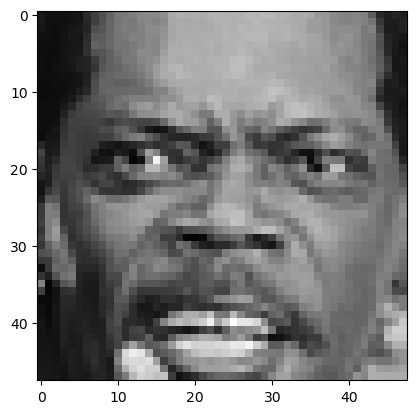

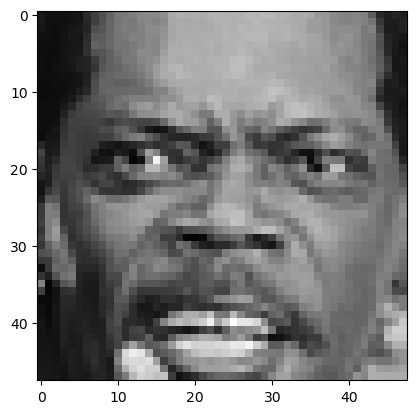

In [9]:

XPreClean = np.ones( (ferDataBackClean.shape[0],2304), float )

print(len(ferDataBack[1,1].split(" ")))
print((ferDataBackClean[10,1].split(" ")))

for i in range( 1, 50):
    XPreClean[i-1] = ferDataBackClean[i,1].split(" ")
    

imgTrain = Xtrain[10].reshape(48, 48)
plt.imshow(imgTrain, cmap='gray')
plt.show()

img = XPreClean[10].reshape(48, 48)    
plt.imshow(img, cmap='gray')
plt.show()



#### Description

Votre description ici

# Partie 3 - Classification

**Point de départ:** *fer2013-clean-pre.csv*

## 3a: Créer et évaluer une approche *template matching*

Un algorithme simple de classification consiste à calculer un modèle (gabarit/prototype/*template*) sur les données d'apprentissage, pour chaque classe (7 émotions = 7 modèles) et utiliser ces modèles (prototypes) pour faire des prédictions sur de nouvelles données.

Si les entrées ont toutes la même dimensionnalité (48x48), une façon très simple de calculer un modèle serait à partir du calcul des moyennes des valeurs de pixels) pour chaque classe.

Étant donné un prototype pour chaque classe (7 prototypes), nous pouvons classifier une nouvelle entrée (image de visage) en mesurant la distance (similarité ou dissimilarité) de telle image par rapport aux sept prototypes et en choisissant le prototype (la classe du prototype) le plus proche.

###  <font color=blue> À faire: </font>
1. Créer un *template*/gabarit/prototype pour chaque classe (émotion) depuis *fer2013-clean-pre.csv*
2. Afficher chaque prototype (visage moyen pour chaque classe)
3. Classifier par *template matching* (plus proche prototype), tous les exemples des ensembles d'apprentissage, validation et test) et rapporter les résultats suivants:<br>
3a. Rapport de classification produit avec *<font color=green>from sklearn.metrics import classification_report</font>*<br>
3b. taux de classification correct sur les trois (3) ensembles de données (sous la forme d'un tableau)<br>
3c. matrice de confusion produite avec *<font color=green> from sklearn.metrics import confusion_matrix</font>* pour les résultats sur l'ensemble de test (matrice 7 x 7 - étiquette x prédictions)
4. Faire une analyse des résultats et présenter vos conclusions sur l'approche *template matching* (Performance globale bonne/mauvaise, pourquoi? Performance par classe bonne/mauvaise pourquoi? Faiblesses et points fort, possibles améliorations, etc.)

#### Code

In [10]:
# Votre code ici
XPrototype = np.ones( (7,2304), float )

#
num_classes = 7  # Assuming 7 classes of emotions
image_size = 48 * 48  # Assuming each image is 48x48 pixels
XPrototype = np.zeros((num_classes, image_size), dtype=float)
XPrototype_sans = np.zeros((num_classes, image_size), dtype=float)
print(len(ferDataBackClean))

labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']


########## Avec les images non nettoyées

for i in range(num_classes):
    conte = 0
    for j in range(len(ferDataBack)):
        if ferDataBack[j, 0] == str(i) and ferDataBack[j, 2] != "PrivateTest":
            conte += 1
            # Convert the pixel values from string to float
            pixel_values = np.array(ferDataBack[j, 1].split(" "), dtype=float)
            XPrototype_sans[i] += pixel_values
    if conte > 0:
        XPrototype_sans[i] /= conte  # Average the sum of the images


################## Avec les images nettoyées

for i in range(num_classes):
    conte = 0
    for j in range(len(ferDataBackClean)):
        if ferDataBackClean[j, 0] == str(i) and ferDataBackClean[j, 2] != "PrivateTest":
            conte += 1
            # Convert the pixel values from string to float
            pixel_values = np.array(ferDataBackClean[j, 1].split(" "), dtype=float)
            XPrototype[i] += pixel_values
    if conte > 0:
        XPrototype[i] /= conte  # Average the sum of the images

for i in range(num_classes):
    print(f"Prototype for class {labels[i]}")
    print(np.mean(XPrototype[i]))
    imgPrototype = XPrototype[i].reshape(48, 48)
    plt.imshow(imgPrototype, cmap='gray')
    plt.show()

for i in range(num_classes):
    print(f"Prototype for class {labels[i]}")
    print(np.mean(XPrototype_sans[i]))
    imgPrototype = XPrototype_sans[i].reshape(48, 48)
    plt.imshow(imgPrototype, cmap='gray')
    plt.show()


35820


NameError: name 'ferDataClean' is not defined

In [ ]:

#Calculate distance
Xtest = np.ones( (3589,2304), float )
from skimage.metrics import structural_similarity as ssim


def euclidean_distance(x, y):
    euclidean_distance = np.linalg.norm(x - y)
    return euclidean_distance

def mean_squared_error(image1, image2):
    if image1.shape != image2.shape:
        raise ValueError("Images must have the same dimensions for comparison.")
    
    # Compute MSE
    mse_value = np.mean((image1 - image2) ** 2)
    return mse_value

def return_distance_labels(image_a_test ):
    lower = 100000000
    index = 0
    for i in range(7):
        distance = mean_squared_error(XPrototype[i].reshape(48,48), image_a_test.reshape(48, 48))
        if distance <= lower:
            lower = distance
            index = i
    return index


correct = 0
incorrect = 0


correctVal = 0
incorrectVal = 0

correctTest = 0
incorrectTest = 0

for i in range(1, len(ferDataBackClean)):
    if ferDataBackClean[i, 2] == 'PrivateTest':
        image = np.array(ferDataBackClean[i, 1].split(" "), dtype=float)
        #Calculated label

        calc_lbl = return_distance_labels(image)
        # Real label
        real_lbl = int(ferDataBackClean[i, 0])
        if calc_lbl == real_lbl:
            correct += 1
        else:
            incorrect += 1
        
    if ferDataBackClean[i, 2] == 'PublicTest':
        image = np.array(ferDataBackClean[i, 1].split(" "), dtype=float)
        #Calculated label

        calc_lbl = return_distance_labels(image)
        # Real label
        real_lbl = int(ferDataBackClean[i, 0])
        if calc_lbl == real_lbl:
            correctVal += 1
        else:
            incorrectVal += 1
        
    if ferDataBackClean[i, 2] == 'Training':
        image = np.array(ferDataBackClean[i, 1].split(" "), dtype=float)
        #Calculated label

        calc_lbl = return_distance_labels(image)
        # Real label
        real_lbl = int(ferDataBackClean[i, 0])
        if calc_lbl == real_lbl:
            correctTest += 1
        else:
            incorrectTest += 1
        

print("Results:")
print("")

print("Training")

print(f"Correct: {correct}")
print(f"Incorrect: {incorrect}")
print(f"Accuracy: {correct / (correct + incorrect) * 100}%")
print("")
print("Validation")
print(f"Correct: {correctVal}")
print(f"Incorrect: {incorrectVal}")
print(f"Accuracy: {correctVal / (correctVal + incorrectVal) * 100}%")
print("")

print("Test")
print(f"Correct: {correctTest}")
print(f"Incorrect: {incorrectTest}")
print(f"Accuracy: {correctTest / (correctTest + incorrectTest) * 100}%")




Results:

Training
Correct: 795
Incorrect: 2785
Accuracy: 22.206703910614525%

Validation
Correct: 810
Incorrect: 2772
Accuracy: 22.613065326633166%

Test
Correct: 6121
Incorrect: 22536
Accuracy: 21.359528213002058%


              precision    recall  f1-score   support

       Angry       0.19      0.06      0.09      4937
     Disgust       0.03      0.11      0.04       546
        Fear       0.20      0.09      0.12      5113
       Happy       0.38      0.11      0.17      8979
         Sad       0.24      0.40      0.30      6064
    Surprise       0.19      0.57      0.29      3993
     Neutral       0.24      0.20      0.22      6187

    accuracy                           0.22     35819
   macro avg       0.21      0.22      0.18     35819
weighted avg       0.25      0.22      0.19     35819

Matrice de confusions


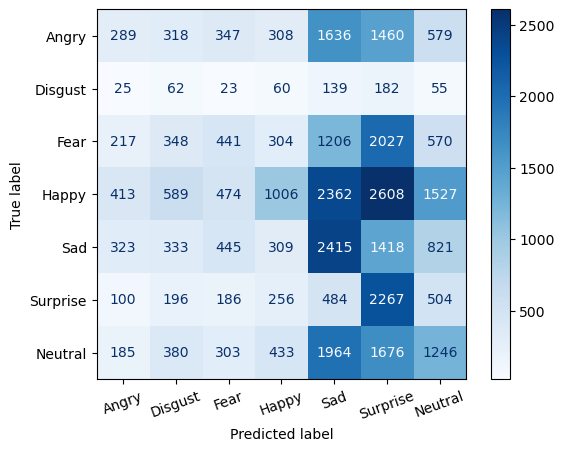

In [ ]:

## Classification et confusion matrix

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Ypred = np.ones((len(ferDataBackClean)-1,1), float )
Ylabel = np.ones((len(ferDataBackClean),1), float )

for i in range(1, len(ferDataBackClean)):
    index = return_distance_labels(np.array(ferDataBackClean[i, 1].split(" "), dtype=float))
    Ypred[i-1] = index

ylabel = ferDataBackClean[1:,0].astype(int)
print(classification_report(ylabel, Ypred, target_names=labels))

emotions = labels
conf_matrix = confusion_matrix(ylabel, Ypred, labels=[0,1,2,3,4,5,6] )


print("Matrice de confusions")
cf_disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
test = cf_disp.plot(cmap=plt.cm.Blues, values_format='.0f', xticks_rotation=20)
plt.plot()
plt.show()



In [ ]:


# Training partition
Xtrain = np.ones( (28709,2304), float )

for i in range( 1, 28710 ):
    Xtrain[i-1] = ferDataBackClean[i,1].split(" ")

ytrain = ferData[1:28710,0].astype( int )

# Validation partition
Xval = np.ones( (3589,2304), float )

for i in range( 28710, 32299 ):
    Xval[i-28710] = ferDataBackClean[i,1].split(" ")

yval = ferData[28710:32299,0].astype( int )

# Test partition
Xtest = np.ones( (3589,2304), float )

for i in range( 32299, 35887 ):
    Xtest[i-32299] = ferDataBackClean[i,1].split(" ")

ytest = ferData[32299:,0].astype( int )

print(Xtrain.shape, Xval.shape, Xtest.shape)

#### Résultats et réponses

Vos réponses ici

Taux de classification (%) - Exemple:

| Ensemble | Modèle TM   |                   
|----------|-------------|
| Train      | 99,67       |                   
| Val      | 89,77       |                             
| Test     | 77,99       |        


# Partie 4 - Étude d'ablation

Point de départ: *fer2013-clean.csv*

Dans l'apprentissage machine, l'ablation est la suppression d'un composant d'un système d'apprentissage machine. Une étude d'ablation étudie les performances d'un système d'apprentissage machine en supprimant certains composants pour comprendre la contribution du composant au système global.

Alors, vous devez évaluer l'importance/contribution du prétraitement sur la performance.

###  <font color=blue> À faire: </font>
**Important: Aucun code requis pour la partie 4. Présentezr juste les résultats sous la forme d'un tableau comparatif.**
1. Refaire la Partie 3 avec *fer2013-clean.csv*
2. Rapportez les résultats suivants:<br>
2a. taux de classification correct sur les trois (3) ensembles de données (sous la forme d'un tableau)<br> 2b. matrice de confusion pour les résultats sur l'ensemble de test (matrice 7 x 7 - étiquettes x prédictions)
3. Faire une analyse des résultats et présenter vos conclusions sur l'importance du prétraitement.



#### Code
Aucun code requis

#### Résultats et résponses

Taux de classification correcte modèle TM (%)


| Ensemble | Avec prétraitement | Sans prétraitement |                                 
:-|:-:|-:
| App      |  99,67%       |   XX,XX%      |                   
| Val      |  89,77%       |   XX,XX%      |                             
| Test     |  77,99%       |   XX,XX%      |        


# Fin